### Notebook: Visualizing Time Independent Models

30 May 2024

Objective:
- Plot ROC curves from data found in catboost models


In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, mean_squared_error

# ------------------------------------------------
# from catboost import CatBoostClassifier, Pool, cv #, MetricVisualizer


# ------------------------------------------------

data_path = "../../main_data/locale_specific_data/"
data_path_catboost = "catboost_info/"
data_path_cat_roc = "catboost_info/roc_data/"

In [58]:
dog_df = pd.read_csv(data_path + "Sonoma_time_independent_data_akry.csv")

dog_df.head()

,breed,color,sex,size,date_of_birth,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,...,outcome_adopt,outcome_adopt_subtype,intake_age,outcome_age,pop_control,sex_bin,size_bin,breed_pit,color_mix,intake_bin
0,PIT BULL,GRAY/WHITE,Female,MED,2012-09-03,A296009,2013-08-22,2014-04-14,235,TRANSFER,...,False,none,0.97,1.61,1,1,3,1,1,4
1,PIT BULL,BLUE/WHITE,Female,MED,2012-10-09,A294143,2013-08-31,2014-04-14,226,STRAY,...,False,none,0.89,1.51,1,1,3,1,1,0
2,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,2007-09-07,A281788,2013-09-19,2014-07-30,314,STRAY,...,False,none,6.03,6.90,0,0,3,0,1,0
3,CHIHUAHUA SH,TAN,Male,TOY,2007-10-01,A297574,2013-10-01,2014-01-01,92,OWNER SURRENDER,...,False,none,6.00,6.25,1,0,1,0,0,1
4,PIT BULL,TAN/WHITE,Male,MED,2012-10-29,A298002,2013-10-08,2014-05-22,226,STRAY,...,True,realtime,0.95,1.57,1,0,3,1,1,0


In [59]:
dog_df.columns

Index(['breed', 'color', 'sex', 'size', 'date_of_birth', 'animal_id',
       'intake_date', 'outcome_date', 'days_in_shelter', 'intake_type',
       'intake_subtype', 'outcome_type', 'outcome_subtype', 'intake_condition',
       'outcome_condition', 'dob_season', 'intake_season', 'outcome_season',
       'outcome_adopt', 'outcome_adopt_subtype', 'intake_age', 'outcome_age',
       'pop_control', 'sex_bin', 'size_bin', 'breed_pit', 'color_mix',
       'intake_bin'],
      dtype='object')

In [60]:
# convert .tsv to .csv and get roc_df
j=0
# tsv_file='roc-file.tsv'
 
# reading given tsv file
tsv_table=pd.read_table(data_path_catboost + "roc-file.tsv",sep='\t')
# python_notebooks/time_independent_modeling/catboost_info/roc-file.tsv
 
roc_csv_name = "roc"+str(j)+'.csv'
# converting tsv file into csv
tsv_table.to_csv(data_path_cat_roc + roc_csv_name,index=False)
 
# output
print("Successfully made csv file", roc_csv_name)

roc_df = pd.read_csv(data_path_cat_roc + roc_csv_name)
roc_df.head(5)

Successfully made csv file roc0.csv


,FPR,TPR,Threshold
0,0.0,0.000000,1.000000
1,0.0,0.000348,0.991088
2,0.0,0.000697,0.989724
3,0.0,0.001393,0.988608
4,0.0,0.001742,0.986786


Area under the ROC curve : 0.836800


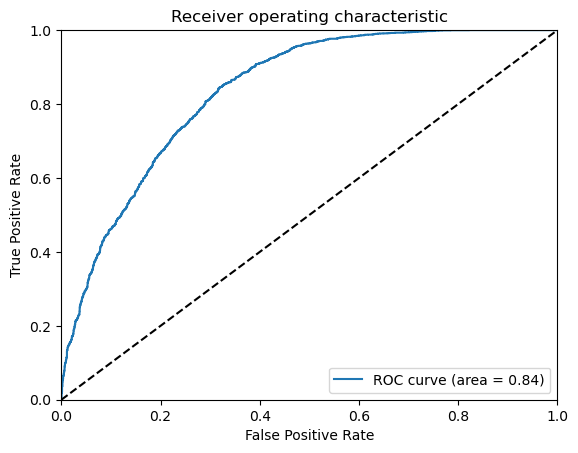

In [61]:
# y_roctest = np.array(rocdf)[:,0]
# probasroc = np.array(rocdf)[:,1]
fpr = np.array(roc_df)[:,0]
tpr = np.array(roc_df)[:,1]
thresholds = np.array(roc_df)[:,2]

#compute area under the curve
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf()
# plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') #line y=x
# plt.plot([0, 1], [0, 1], 'k--') #line y=prevalence*x
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()